# INTRODUCTION
The video game entertainment industry is a multi-billion dollar industry that is
continuously growing every year. There are some video games out there that are selling millions
of copies and some that are barely making a scratch in the industry. What makes one game sell
more than another? Are there trends or relationships that help in explaining a video game’s
global sales? These questions, as well as many others, are important ones to ask if you are
interested in the video game entertainment industry. The results of this project may be
helpful in identifying the factors that affect how well a video game performs in sales, potentially
providing direction for companies or even reinforcing certain business decisions that they have
already made. Given the dataset being used, the main question for this capstone project is if the
Metacritic score of a video game has an effect on how well a video game sells. Other questions
about video games may also provide insight into how successful a video game is. These others
questions that can be explored are who made the game, when was the game released, what
kind of a video game is it, and who reviewed the game?

# DATA
The data for this project came from a Kaggle. The data will be used to find insights into whether or not metacritic ratings have an affect on video game sales.

### Data Cleaning and Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv('/kaggle/input/video-game-sales-with-ratings/Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E


The dataset will now be inspected to see what needs to be cleaned or dealt with. Looking at the DataFrame info revealed that there are many null values in some of the columns.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


It looks like this dataset contains games that have yet to be released. This dataset was compiled in 2016. Any games past 2016 will be filtered out.

In [4]:
df.Year_of_Release.max()

2020.0

In [5]:
#Filtering for games only up to 2016
df_year = df[df['Year_of_Release'] < 2017]
df_year['Year_of_Release'].max()

2016.0

Given the main question of this project, only records that have both critic and user scores and have global sales larger than 0 will be observed. All other video games will not be included.

In [6]:
#will only want to work with data that has critic/user scores and Global sales > 0
dfScores = df_year[(df_year['User_Score'].notnull() & df_year['Critic_Score'].notnull()) & df_year['Global_Sales'] > 0]
dfScores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7950 entries, 0 to 16709
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7950 non-null   object 
 1   Platform         7950 non-null   object 
 2   Year_of_Release  7950 non-null   float64
 3   Genre            7950 non-null   object 
 4   Publisher        7949 non-null   object 
 5   NA_Sales         7950 non-null   float64
 6   EU_Sales         7950 non-null   float64
 7   JP_Sales         7950 non-null   float64
 8   Other_Sales      7950 non-null   float64
 9   Global_Sales     7950 non-null   float64
 10  Critic_Score     7950 non-null   float64
 11  Critic_Count     7950 non-null   float64
 12  User_Score       7950 non-null   object 
 13  User_Count       6894 non-null   float64
 14  Developer        7944 non-null   object 
 15  Rating           7878 non-null   object 
dtypes: float64(9), object(7)
memory usage: 1.0+ MB


The Year_of_Release column currently contains values that have decimal places. Years are not expressed as floats. This column will be converted into a integer data type.

In [7]:
dfScores['Year_of_Release'] = dfScores['Year_of_Release'].astype(int)
dfScores['Year_of_Release'].head()

0    2006
2    2008
3    2009
6    2006
7    2006
Name: Year_of_Release, dtype: int64

Using the pandas DataFrame .describe method, the summary statistics of all the numerical columns can be observed.

In [8]:
#Observing summary statistics
dfScores.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,7950.000000,7950.000000,7950.000000,7950.000000,7950.000000,7950.000000,7950.000000,7950.000000,6894.000000
mean,2007.200252,0.354977,0.209971,0.056001,0.073143,0.694374,68.997610,26.500000,174.392370
std,4.183446,0.903674,0.641387,0.267856,0.251738,1.833719,13.914259,19.019544,584.872155
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2004.000000,0.050000,0.010000,0.000000,0.010000,0.100000,60.000000,12.000000,11.000000
50%,2007.000000,0.130000,0.050000,0.000000,0.020000,0.250000,71.000000,22.000000,27.000000
75%,2010.000000,0.340000,0.180000,0.010000,0.060000,0.660000,79.000000,37.000000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,10665.000000


There is a very large outlier in global sales. Sorting the global sales columns reveals that this outlier comes from "Wii Sports". This outlier will be kept in the dataset for now.

In [9]:
dfScores[['Name','Global_Sales']].sort_values('Global_Sales',ascending=False).head()

,Name,Global_Sales
0,Wii Sports,82.53
2,Mario Kart Wii,35.52
3,Wii Sports Resort,32.77
6,New Super Mario Bros.,29.80
7,Wii Play,28.92


Using the value_counts method, it is seen that there are many repeats for some video game titles.

In [10]:
dfScores.Name.value_counts().head()

Cars                                       8
Need for Speed: Most Wanted                8
Madden NFL 08                              8
Madden NFL 07                              8
LEGO Star Wars II: The Original Trilogy    8
Name: Name, dtype: int64

Looking deeper as to why certain games appear multiple times. A high value counted video game, Need for Speed, was looked at. It is seen that the reason for the multiple occurrences was due to the video game being released on different platforms and for different Developer.

In [11]:
#inspecting as to why there are duplicate names
df_NfS = dfScores[dfScores.Name == 'Cars'].sort_values('Global_Sales', ascending=False)
df_NfS.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1651,Cars,PS2,2006,Racing,THQ,1.01,0.04,0.0,0.16,1.21,71.0,30.0,8.4,12.0,Rainbow Studios,E
1685,Cars,PSP,2006,Racing,THQ,0.72,0.28,0.0,0.20,1.20,70.0,17.0,7,4.0,Locomotive Games,E
1805,Cars,GBA,2006,Racing,THQ,0.81,0.30,0.0,0.02,1.13,50.0,8.0,4.7,6.0,Helixe,E


To deal with the duplicates the dataset will need to be grouped by the video game name. The rest of the columns would need to be aggregated. The year with the largest sales, the publisher with the most occurrences, the sum of the global sales, max of the critic and user scores, and the mode of the genre will be computed.

In [12]:
col = ['Name', 'Year_of_Release','Publisher', 'Genre', 'Global_Sales','Critic_Score', 'User_Score']
dfClean = dfScores.groupby('Name')[col].agg({'Genre':pd.Series.mode,
                                             'Year_of_Release':'first',
                                             'Publisher': pd.Series.mode,
                                             'Global_Sales': 'sum',
                                             'Critic_Score': 'max',
                                             'User_Score': 'max'})
dfClean.head(3)

,Genre,Year_of_Release,Publisher,Global_Sales,Critic_Score,User_Score
Name,,,,,,
Tales of Xillia 2,Role-Playing,2012,Namco Bandai Games,0.84,71.0,7.9
.hack//Infection Part 1,Role-Playing,2002,Atari,1.27,75.0,8.5
.hack//Mutation Part 2,Role-Playing,2002,Atari,0.68,76.0,8.9


The final data cleaning steps will be to scale up the user scores to match the critic scores and to sort the dataset by global sales. Scaling up the user scores will allow comparisons to critic scores with the other variables.

In [13]:
#Scaling up user scores and sorting the dataset by global sales
dfClean['User_Score'] = dfClean['User_Score'].replace('tbd',np.nan)
dfClean.dropna(inplace=True)
dfClean['User_Score'] = dfClean['User_Score'].apply(lambda x:float(x))*10
dfClean = dfClean.sort_values('Global_Sales',ascending=False).reset_index()
dfClean.head()

,Name,Genre,Year_of_Release,Publisher,Global_Sales,Critic_Score,User_Score
0,Wii Sports,Sports,2006,Nintendo,82.53,76.0,80.0
1,Grand Theft Auto V,Action,2013,Take-Two Interactive,56.57,97.0,83.0
2,Mario Kart Wii,Racing,2008,Nintendo,35.52,82.0,83.0
3,Wii Sports Resort,Sports,2009,Nintendo,32.77,80.0,80.0
4,Call of Duty: Modern Warfare 3,Shooter,2011,Activision,30.59,88.0,34.0


After the cleaning and data wrangling of the video games dataset, the total amount of video games that will be looked at went to about 4.1 thousand. 

In [14]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4107 entries, 0 to 4106
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             4107 non-null   object 
 1   Genre            4107 non-null   object 
 2   Year_of_Release  4107 non-null   int64  
 3   Publisher        4107 non-null   object 
 4   Global_Sales     4107 non-null   float64
 5   Critic_Score     4107 non-null   float64
 6   User_Score       4107 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 224.7+ KB


In [15]:
dfClean.describe()

,Year_of_Release,Global_Sales,Critic_Score,User_Score
count,4107.000000,4107.000000,4107.000000,4107.000000
mean,2007.121987,1.233487,70.847334,74.538836
std,4.344344,2.961297,14.042844,13.574787
min,1985.000000,0.010000,19.000000,7.000000
25%,2004.000000,0.130000,63.000000,69.000000
50%,2007.000000,0.390000,73.000000,78.000000
75%,2010.000000,1.210000,81.000000,84.000000
max,2016.000000,82.530000,98.000000,96.000000


# Data Story: Visualizations and EDA
In this part of the project, the different variables of the dataset will be explored. They will be plotted against each others to see what type of potential correlations or trends can be found through the visualizations.

**Questions to explore**

Looking at the intial information for the dataset, a set of questions to look at was constructed. Each question will be explored and any observations or potential inferences and insights will be stated.

* **What does critic/user scores and global sales look like?**
* **How does genre affect global sales?**
* **How much better do popular publishers perform?**
* **Is there a correlation between count of genre per publisher?**
* **How do count of games per publisher relate to global sales?**
* **Which publishers have the highest average ratings?**
* **How many unique games, with metacritic ratings, are sold globally each year?**

In [16]:
dfClean.head()

,Name,Genre,Year_of_Release,Publisher,Global_Sales,Critic_Score,User_Score
0,Wii Sports,Sports,2006,Nintendo,82.53,76.0,80.0
1,Grand Theft Auto V,Action,2013,Take-Two Interactive,56.57,97.0,83.0
2,Mario Kart Wii,Racing,2008,Nintendo,35.52,82.0,83.0
3,Wii Sports Resort,Sports,2009,Nintendo,32.77,80.0,80.0
4,Call of Duty: Modern Warfare 3,Shooter,2011,Activision,30.59,88.0,34.0


### 1. What does critic/user scores and global sales look like?
Exploring the data it can be seen that there are outliers in the global sales of video games. These outliers will affect how the plot of Metacritic scores and global sales will look. Lets remove them and plot the visualizations.

In [17]:
#checking for outliers and their indices
dfClean[['Name','Global_Sales']].sort_values('Global_Sales',ascending=False).head()

,Name,Global_Sales
0,Wii Sports,82.53
1,Grand Theft Auto V,56.57
2,Mario Kart Wii,35.52
3,Wii Sports Resort,32.77
4,Call of Duty: Modern Warfare 3,30.59


"Wii Sports" and "Grand Theft Auto V" will be removed by index for this initial plotting.

In [18]:
#removed by index for wii sports and grand theft auto
#stored the dataFrame in a new variable
no_outlier = dfClean.drop([0,1],axis=0)
no_outlier.head(3)

,Name,Genre,Year_of_Release,Publisher,Global_Sales,Critic_Score,User_Score
2,Mario Kart Wii,Racing,2008,Nintendo,35.52,82.0,83.0
3,Wii Sports Resort,Sports,2009,Nintendo,32.77,80.0,80.0
4,Call of Duty: Modern Warfare 3,Shooter,2011,Activision,30.59,88.0,34.0


### Observing for question 1
By looking at the plots below, it can be seen that a trend exists. The higher the scores, the higher the global sales tend to be.

<AxesSubplot:xlabel='User_Score', ylabel='Global_Sales'>

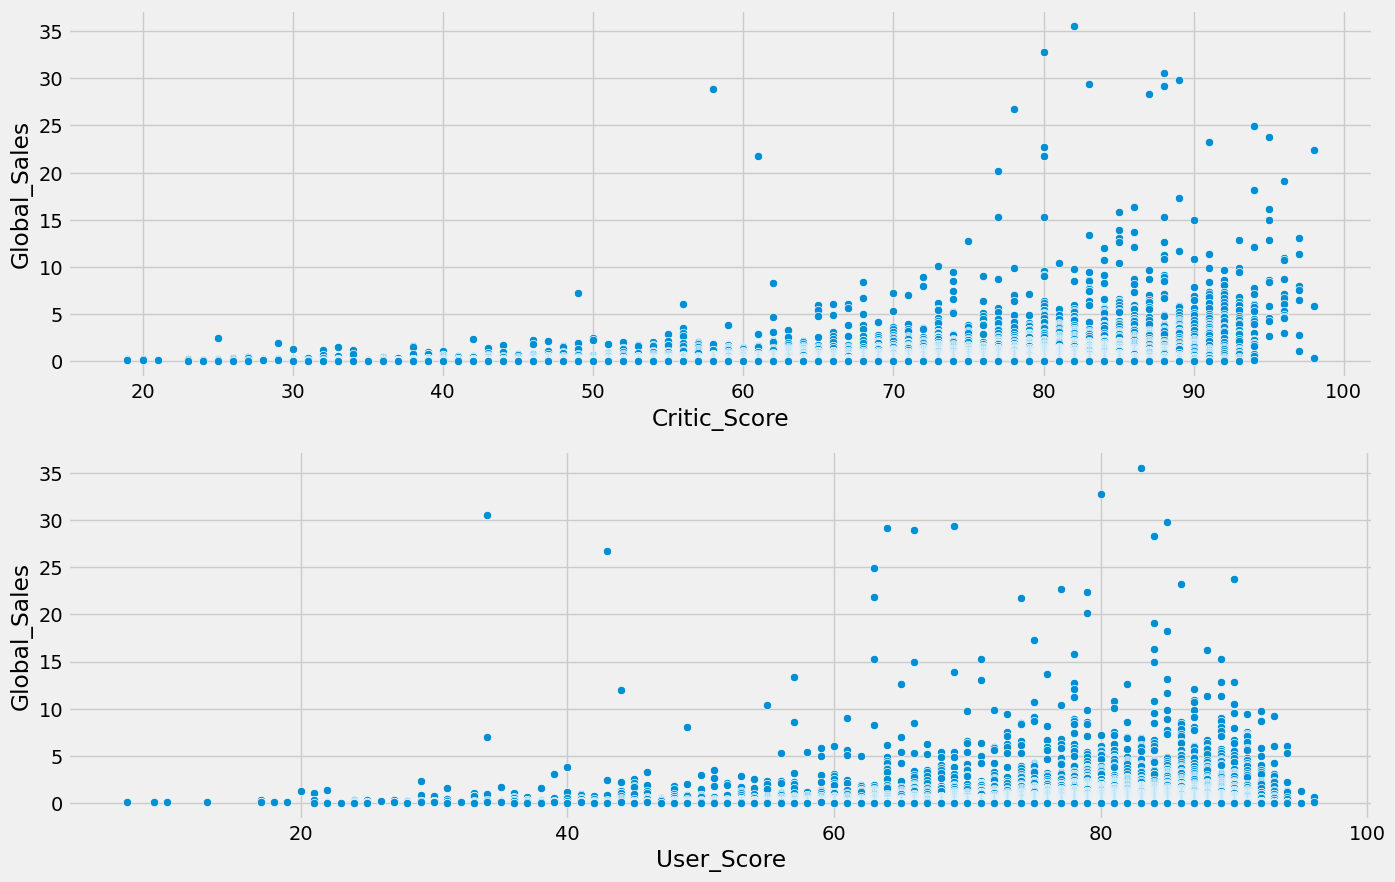

In [19]:
plt.figure(figsize=(15,10))
#Plotting Critic Score versus Global Sales
plt.subplot(2,1,1)
sns.scatterplot(data=no_outlier,x='Critic_Score',y='Global_Sales')

#Plotting User Score versus Global Sales
plt.subplot(2,1,2)
sns.scatterplot(data=no_outlier,x='User_Score',y='Global_Sales')

### Statistical Inference for question 1
The visualizations were made while exploring the dataset. These visualizations assisted in coming up with some questions that could be looked into in order to describe the trends or relationships between the different video game variables. In this notebook, the visualizations will be used to guide the way to some potential statisical inferences that may be concluded from this dataset.

When a video game is scored highly it would be intuitive to think that the video game would be doing well in sales. Lets see if there is a significant correlation between the Metacritic scores and the global sales of video games through a linear regression analysis.

Plot a scatter plot of two variables with some default settings.

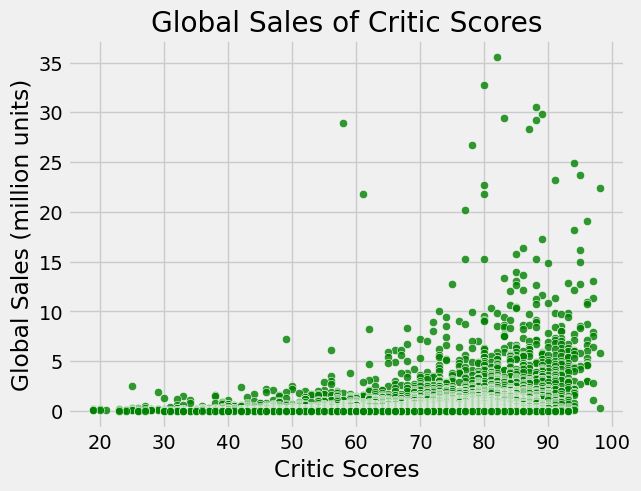

In [20]:
sns.scatterplot(data=no_outlier,x='Critic_Score',y='Global_Sales',alpha=0.8,color='green')
plt.title('Global Sales of Critic Scores')
plt.ylabel('Global Sales (million units)')
plt.xlabel('Critic Scores')
plt.show()

**Observations:**

This visualization does not show much. A majority of the sales are low with a few data points being higher. Taking the logarithm of global sales should help visualize the data points better. Lets also try to fit a line to this plot and perform a hypothesis test to see if there is any correlation between critic scores and global sales. The null and alternative hypotheses are as follows:

* H0: There is no correlation between critic scores and global sales. The slope of the regession line is zero.
* Ha: There is a correlation between critic scores and global sales. The slope of the regression line is not zero.

The significance level will be 0.05.

In [21]:
#defining function for linear regression, fits a line and returns the r-squared and p-value
import scipy.stats as stats

def linereg(data1, data2):
    slope, intercept, r, p = stats.linregress(data1, data2)[:4]
    y = slope*data1 + intercept
    plt.plot(data1, y)
    return r**2, p

Plotting the log of global sales against the critic score. Performing the linreg function on the two variables fits a line to the dataset and returns the r-squared value and the p-value.

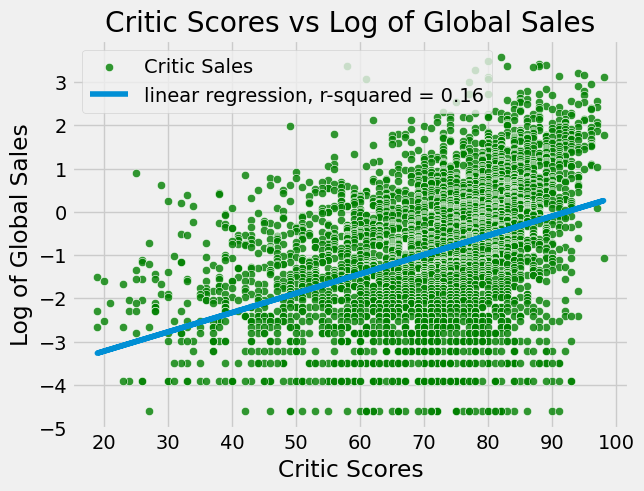

p-value = 4.95e-159


In [22]:
#plotting log of global sales
sns.scatterplot(data=no_outlier,x='Critic_Score',y=np.log(no_outlier['Global_Sales']),alpha=0.8,color='green')
plt.title('Critic Scores vs Log of Global Sales')
plt.ylabel('Log of Global Sales')
plt.xlabel('Critic Scores')

#fitting line
r2_score_sales, p_score_sales = linereg(no_outlier['Critic_Score'], np.log(no_outlier['Global_Sales']))
plt.legend(('Critic Sales', 'linear regression, r-squared = {}'.format(round(r2_score_sales,2))))
plt.show()

print("p-value = %.2e" % p_score_sales)

**Conclusions:**

The p-value of 4.95e-159 is below our significance level of 0.05. This means that given there was no correlation between critic scores and the log of global sales, we would have a practically zero probability of getting our observed slope. We can reject our null hypothesis of having no correlation and accept our alternative hypothesis of there being a correlation between global sales and critic scores.

This data shows that there is a correlation betwen Metacritic scores and global sales, but that the linear regression model does not fit the actual datapoints too well. Maybe other factors affect the global sales more significantly.

### 2. How does genre affect global sales?
In order to see this, the dataset will first need to be filtered and grouped by the various video game genre. Using the unique method on a pandas series will return all the unique values of that column.

In [23]:
dfClean.Genre.unique()

array(['Sports', 'Action', 'Racing', 'Shooter', 'Platform', 'Misc',
       'Role-Playing', 'Puzzle', 'Simulation', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

There are 12 genres that video games could be categorized under. The dataset will now be grouped by genre with an aggregation on the sum total of global sales. The data will be sorted by ascending global sales.

In [24]:
df_genre = dfClean.groupby('Genre')['Global_Sales'].sum().reset_index().sort_values('Global_Sales',ascending=False)
df_genre

,Genre,Global_Sales
0,Action,1141.23
8,Shooter,811.32
10,Sports,734.35
7,Role-Playing,501.82
6,Racing,448.15
3,Misc,399.34
4,Platform,364.04
2,Fighting,243.30
9,Simulation,200.59
1,Adventure,78.22


### Observing for question 2
It is clearly seen that action games sell the most. This observation could be explored further to see what may have caused the large global sales for action video games.

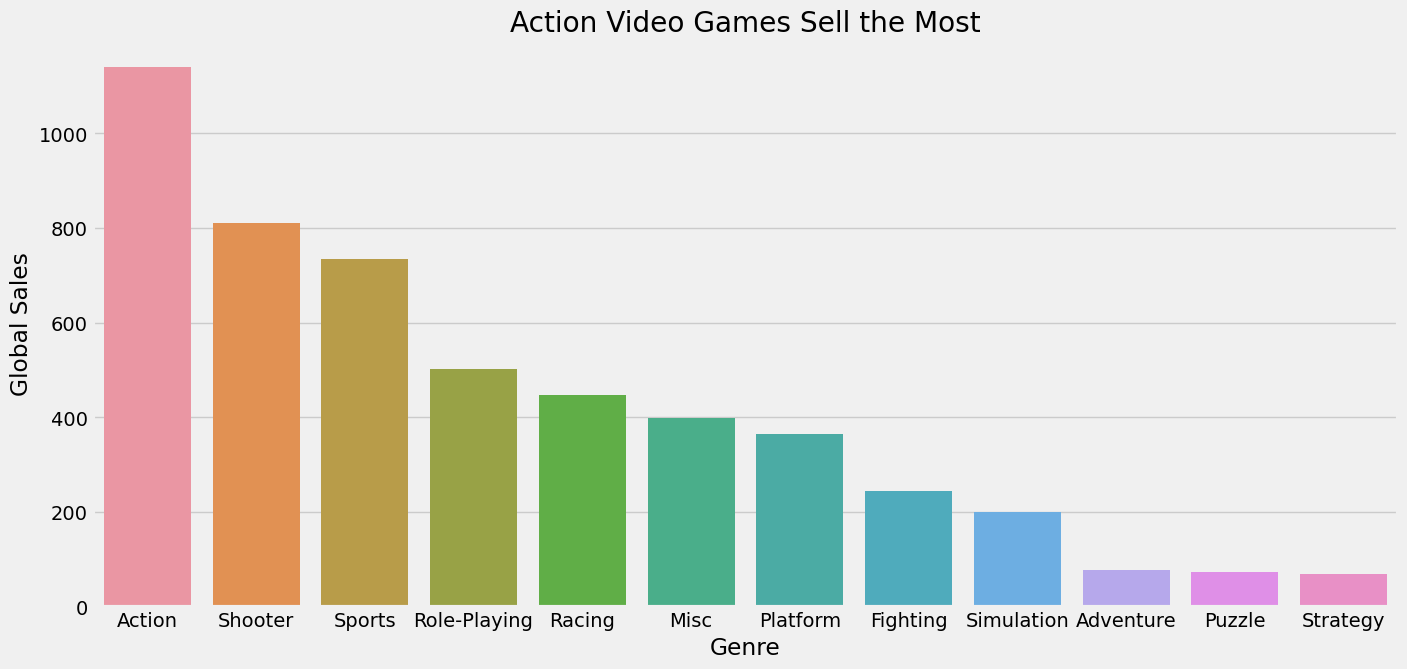

In [25]:
plt.figure(figsize=(15,7))
sns.barplot(data=df_genre,x='Genre',y='Global_Sales')
plt.ylabel('Global Sales')
plt.title('Action Video Games Sell the Most')
plt.show()

### 3. How much better do popular publishers perform?
There are 311 different video game publishers in this dataset. Only the top 10 publishers who released the most games will be looked at for this initial analysis.

In [26]:
top_pub = dfClean.Publisher.value_counts()
top_pub.head(10),print('Amount of different publishers:',len(top_pub))

Amount of different publishers: 311


(Electronic Arts                 348
 Nintendo                        289
 Sony Computer Entertainment     277
 Ubisoft                         256
 Sega                            178
 Activision                      177
 Namco Bandai Games              172
 Konami Digital Entertainment    160
 THQ                             147
 Microsoft Game Studios          130
 Name: Publisher, dtype: int64,
 None)

The top 10 publisher names were extracted from the value counts series and stored in an array. The array was then used to filter the dataset by the top 10 publishers.

In [27]:
#storing the array of publisher names to a variable
top10_pub = top_pub.head(10).index.values
#filtered the dataframe by the top 10 publishers
df_top10 = dfClean[dfClean['Publisher'].isin(top10_pub)]
df_top10.head()

,Name,Genre,Year_of_Release,Publisher,Global_Sales,Critic_Score,User_Score
0,Wii Sports,Sports,2006,Nintendo,82.53,76.0,80.0
2,Mario Kart Wii,Racing,2008,Nintendo,35.52,82.0,83.0
3,Wii Sports Resort,Sports,2009,Nintendo,32.77,80.0,80.0
4,Call of Duty: Modern Warfare 3,Shooter,2011,Activision,30.59,88.0,34.0
5,New Super Mario Bros.,Platform,2006,Nintendo,29.80,89.0,85.0


To create a visualization between publishers and global sales, the data set needs to be grouped by publishers and an aggregation on the sum of global sales.

In [28]:
top10 = df_top10.groupby('Publisher')['Global_Sales'].sum().reset_index().sort_values('Global_Sales',ascending=False)
top10

,Publisher,Global_Sales
5,Nintendo,849.48
1,Electronic Arts,774.10
0,Activision,490.59
7,Sony Computer Entertainment,381.01
9,Ubisoft,331.50
3,Microsoft Game Studios,211.45
6,Sega,139.85
2,Konami Digital Entertainment,134.96
8,THQ,130.64
4,Namco Bandai Games,112.16


### Observing for question 3
Both a pie chart and a bar graph will be looked at for the same data to see the differences in visualization methods. It is much harder to see the differences in the publishers in a pie chart than it is in a bar graph. Through the bar graph, it can be seen that both Nintendo and EA are the top selling publishers among the top 10 most popular. They perform better by nearly 200 million units sold over the next highest seller.

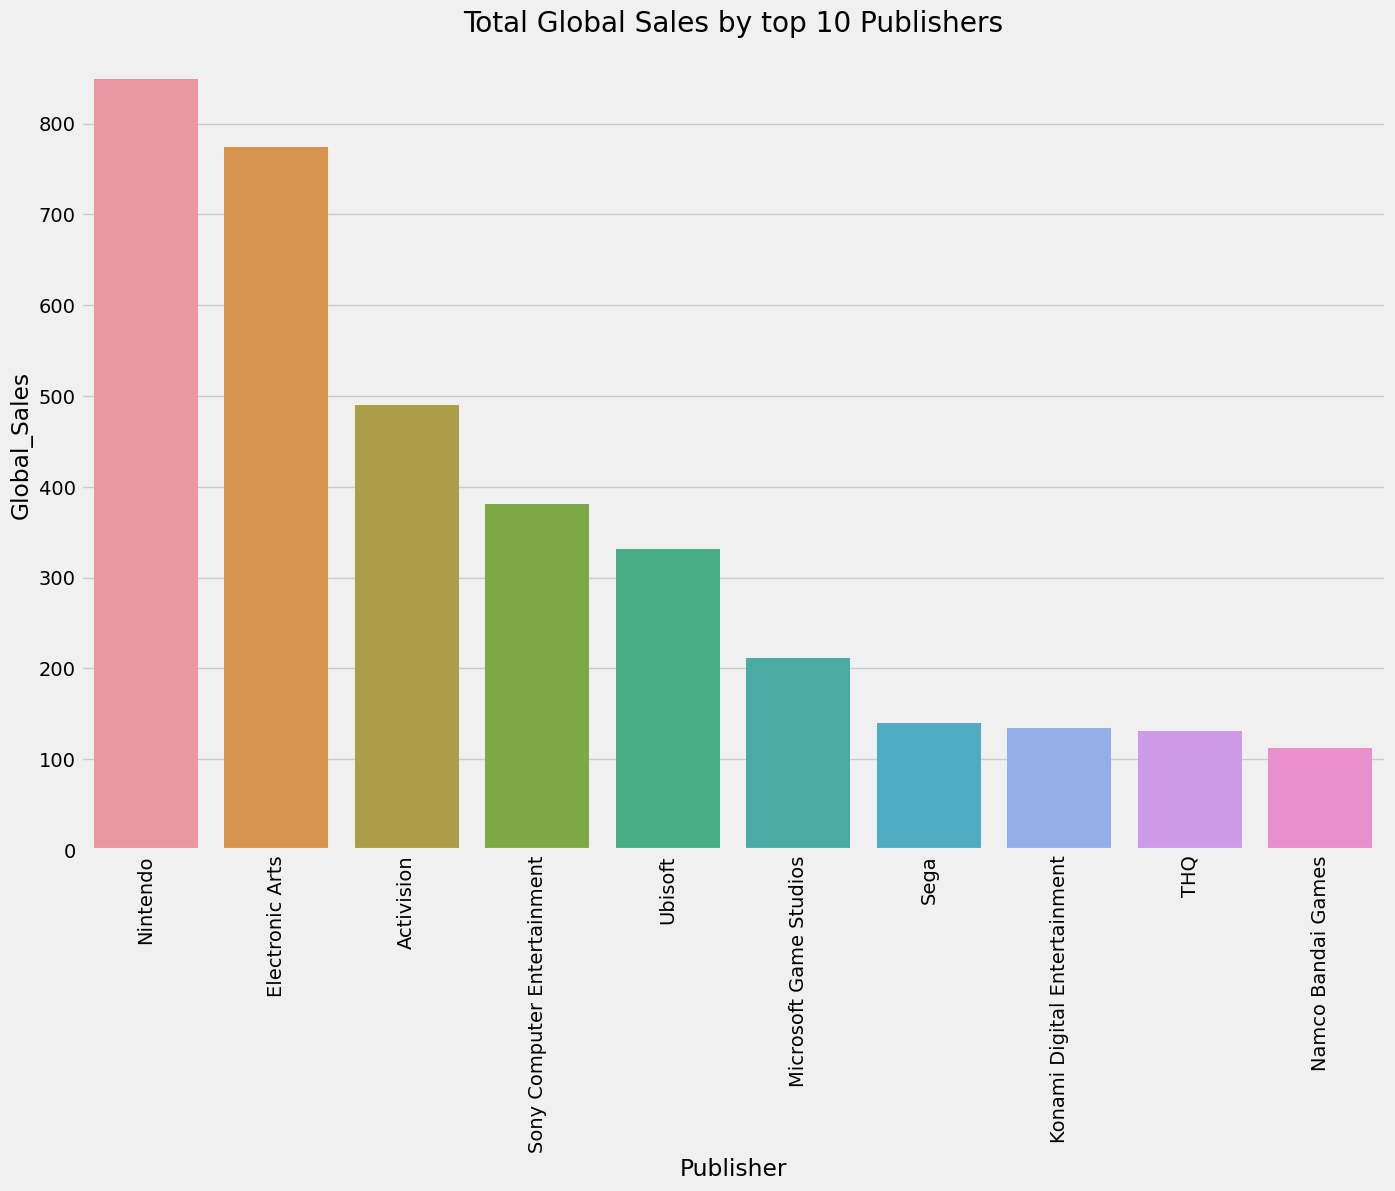

In [29]:
plt.figure(figsize=(15,10))
sns.barplot(data=top10,x='Publisher',y='Global_Sales')
plt.title('Total Global Sales by top 10 Publishers')
plt.xticks(rotation=90)
plt.show()

### 4. Is there a correlation between count of genre per publisher?
The previous question took a look at the count of video games produced per publisher. This question will explore which genres some publishers tended to produce. The top 5 most popular publishers and their video game genre counts will be looked at.

The dataset will be grouped by publisher and genre, forming a multilevel index. The count of each genre will also be aggregated, using the pandas size method.

In [30]:
#creating a multilevel index for publisher and genre
top5_pub = top_pub.head().index.values 
df_top5 = dfClean[dfClean['Publisher'].isin(top5_pub)]
gen_pub = df_top5.groupby(['Genre','Publisher']).size().reset_index(name='count')
gen_pub

,Genre,Publisher,count
0,Action,Electronic Arts,37
1,Action,Nintendo,37
2,Action,Sega,32
3,Action,Sony Computer Entertainment,52
4,Action,Ubisoft,62
5,Adventure,Electronic Arts,4
6,Adventure,Nintendo,17
7,Adventure,Sega,2
8,Adventure,Sony Computer Entertainment,16
9,Adventure,Ubisoft,12


### Observing for question 4
The most noticeable aspect of the visualization is that there is a very large amount of sports games produced by EA. It also can be seen that action videos games tend to be published more. This shows that there may be some variation in the distribution of genres for video games.

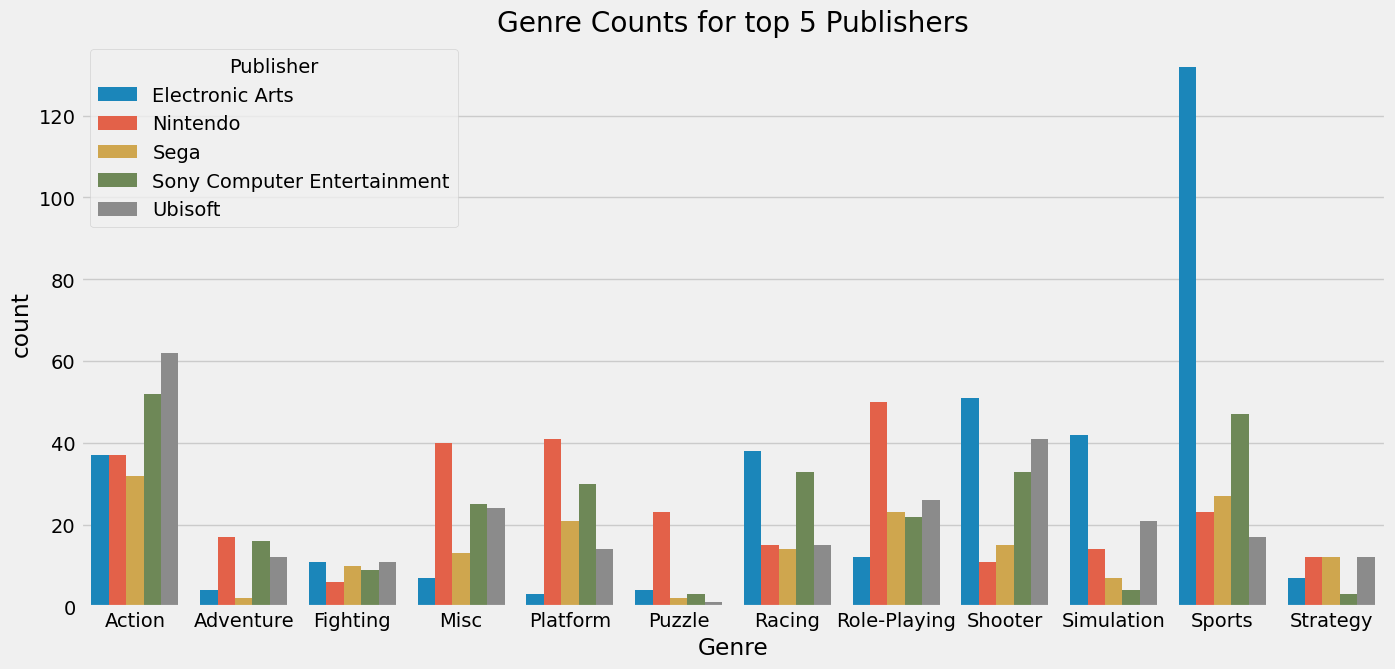

In [31]:
plt.figure(figsize=(15,7))
sns.barplot(data=gen_pub,x='Genre',y='count',hue='Publisher')
plt.title('Genre Counts for top 5 Publishers')
plt.show()

### 5. How do count of games per publisher relate to global sales?
Each publisher will be plotted for their total amount of games published against their total global sales.

The data was grouped by publisher and aggregated on the sum of global sales and the count of video games.

In [32]:
#grouped by publisher with aggregations on the count of publishers and their sum of global sales
dfClean.Publisher = dfClean.Publisher.astype(str)
pub_sale = dfClean.groupby('Publisher')['Global_Sales'].agg(['count','sum'])
pub_sale.head()

,count,sum
Publisher,,
10TACLE Studios,1,0.02
1C Company,3,0.10
2D Boy,1,0.04
3DO,12,2.24
505 Games,55,31.14


### Observing for question 5
There is an obvious trend between count of games per publishers and their total global sales. The more video games a publisher releases, the more they sell.

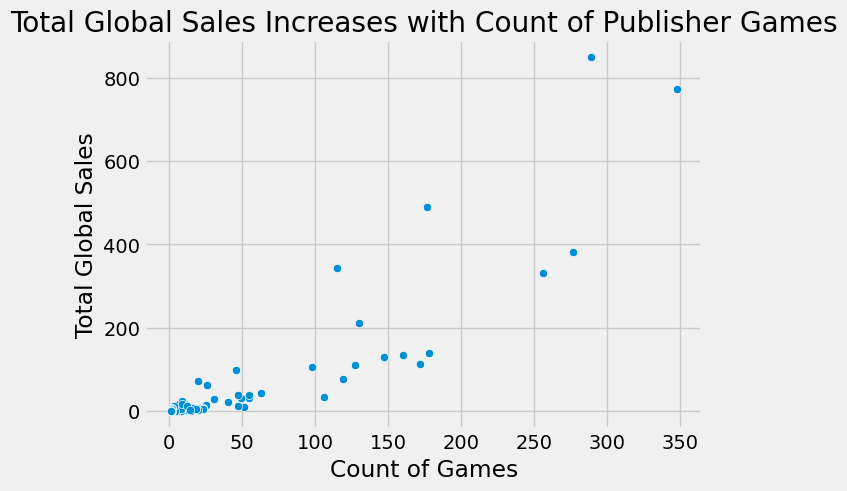

In [33]:
sns.scatterplot(data=pub_sale,x='count',y='sum')
plt.title('Total Global Sales Increases with Count of Publisher Games')
plt.xlabel('Count of Games')
plt.ylabel('Total Global Sales')
plt.show()

### Statistical Inference for question 5
It was seen from the data exploration that the more video games a company makes, the more they sell. Lets see if linear regression can be used to fit the observed data.

We make a copy dataframe of the original dataframe. The code below is adding a column to the dataset that shows the total count of video games made per publisher. This is done by first separating the publisher column into its own dataframe and then performing the value counts method on it. The copy of the original dataframe is then merged with the value counts dataframe on publisher.

In [34]:
#adding count of games per publisher column to the dataset
dfClean_new = dfClean.copy()
game_count = dfClean_new.Publisher.value_counts().reset_index()
game_count.columns = ['Publisher','count']
df_count = dfClean_new.merge(game_count,on='Publisher').sort_values('Global_Sales',ascending=False).reset_index().drop('index',axis=1)
df_count.head(3)

,Name,Genre,Year_of_Release,Publisher,Global_Sales,Critic_Score,User_Score,count
0,Wii Sports,Sports,2006,Nintendo,82.53,76.0,80.0,289
1,Grand Theft Auto V,Action,2013,Take-Two Interactive,56.57,97.0,83.0,115
2,Mario Kart Wii,Racing,2008,Nintendo,35.52,82.0,83.0,289


Grouping the dataset by publisher and count and aggregating on the sum of global sales.

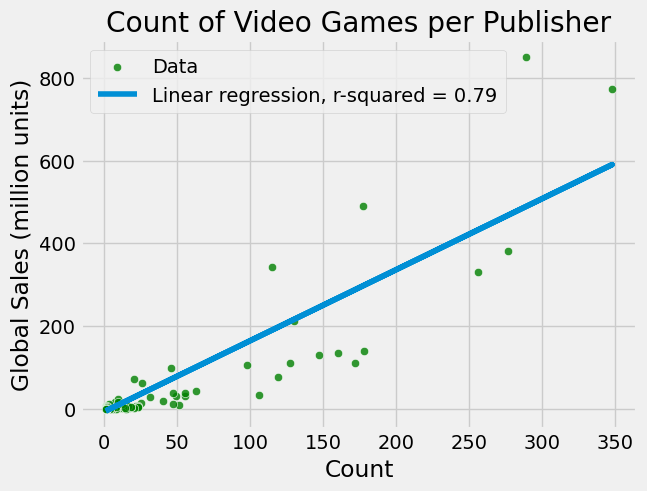

In [35]:
#grouping by publisher and count of games, aggregating on sum of global sales
df_count_sales = df_count.groupby(['Publisher','count'])['Global_Sales'].sum().reset_index()

#plot the values
sns.scatterplot(data=df_count_sales,x='count',y='Global_Sales',alpha=0.8,color='green')
plt.xlabel('Count')
plt.ylabel('Global Sales (million units)')
plt.title('Count of Video Games per Publisher')

#fitting line
r_count_sales, p_count_sales = linereg(df_count_sales['count'], df_count_sales['Global_Sales'])
plt.legend(('Data', 'Linear regression, r-squared = %.2f' % r_count_sales))
plt.show()

**Observations:**

There looks to be an obvious positive trend in the amount of video games sold and global sales. However, a large amount of the datapoints are all grouped up towards the bottom left of the plot. Taking the log of both global sales and count of video games will help visualize the data points better as well as the linear regression. The null and alternative hypothesis are as follows:

* H0: There is no correlation between log of count and log of sales. The slope of the regession line is zero.
* Ha: There is a correlation between log of count and log of sales. The slope of the regression line is not zero.

The significance level will be 0.05.

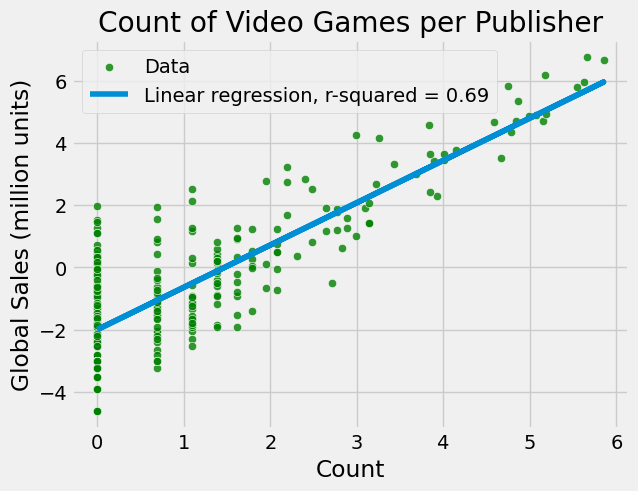

p-value = 3.51e-78


In [36]:
#plot the values
sns.scatterplot(x=np.log(df_count_sales['count']),y=np.log(df_count_sales['Global_Sales']),alpha=0.8,color='green')
plt.xlabel('Count')
plt.ylabel('Global Sales (million units)')
plt.title('Count of Video Games per Publisher')

#fitting line
r_logcount_sales, p_logcount_sales = linereg(np.log(df_count_sales['count']), np.log(df_count_sales['Global_Sales']))
plt.legend(('Data', 'Linear regression, r-squared = %.2f' % r_logcount_sales))
plt.show()

print("p-value = %.2e" % p_logcount_sales)

**Conclusions:**

The p-value tells us the probability of getting the observed value of the slope for the linear regression if the true slope was zero. The p-value, 3.51e-78, is below our significance level of 0.05, therefore we can reject the null hypothesis that there is no correlation between our variables. We accept the alternative hypothesis that there is a statistically significant correlation between the log of video game counts per publisher and the log of global sales.

The R2 indicates that the linear regression model explains about 69% of the log of global sale's variation.

### 6. Which publishers have highest average ratings?
Once again, only the top 10 publishers will be observed. Their average scores on Metacritic, for both critic and user scores, will be looked at.

The dataset will be grouped by publisher with aggregations on the mean of both critic and user scores.

In [37]:
top10_scores = df_top10.groupby('Publisher')['Critic_Score','User_Score'].mean().sort_values('Publisher')
top10_scores.head(10)

,Critic_Score,User_Score
Publisher,,
Activision,72.129944,73.163842
Electronic Arts,76.801724,75.241379
Konami Digital Entertainment,70.962500,75.793750
Microsoft Game Studios,76.530769,74.446154
Namco Bandai Games,67.418605,74.784884
Nintendo,76.134948,79.200692
Sega,73.235955,76.561798
Sony Computer Entertainment,75.357401,77.361011
THQ,70.034014,75.115646


### Observing for question 6
Nintendo has the highest user score of the top 10 publishers. It also looks like Nintendo, EA scored similarly in critic scores. This bar chart also shows that users tend to give higher ratings over critics with Electronic Arts and Microsoft Game Studios being an exception.

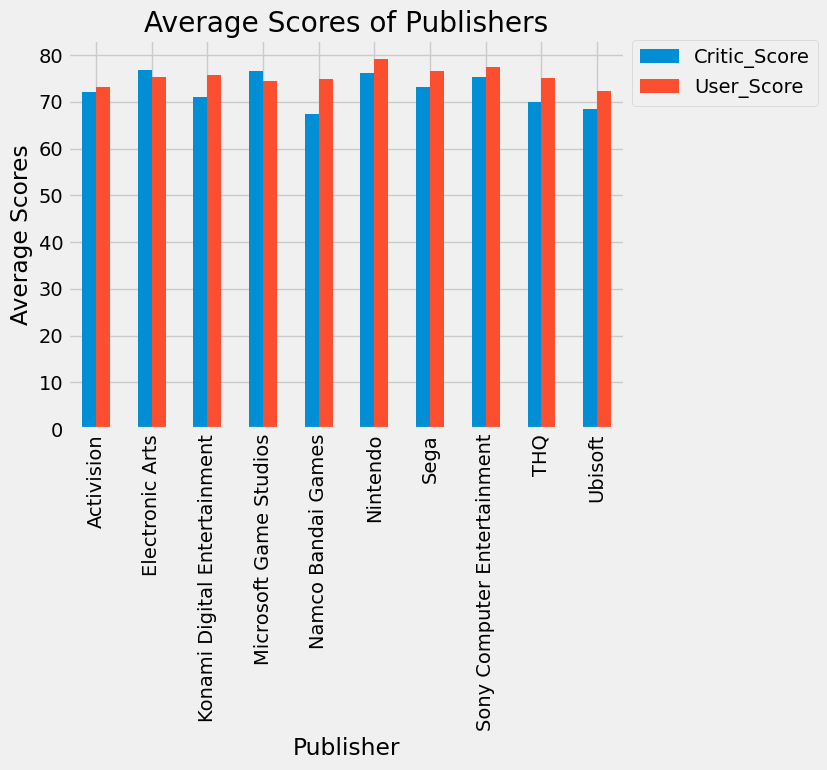

In [38]:
top10_scores.plot.bar()
plt.ylabel('Average Scores')
plt.legend(loc='upper left', bbox_to_anchor=(0.995,1.025))
plt.title('Average Scores of Publishers')
plt.show()

### 7. How many unique games, with metacritic ratings, are sold globally each year?
The current DataFrame only contains video games released from 1985 to 2016 that has both critic and user Metacritic ratings.

In order to visualize the amount of games released each year, the dataset would need to be grouped by year of release with an aggregation on the count of games.

In [39]:
year_game = dfClean.groupby('Year_of_Release').size()
year_game

Year_of_Release
1985      1
1988      1
1994      1
1996      7
1997     14
1998     25
1999     30
2000     90
2001    204
2002    288
2003    292
2004    289
2005    342
2006    325
2007    329
2008    349
2009    310
2010    240
2011    259
2012    179
2013    143
2014    136
2015    132
2016    121
dtype: int64

### Observing for question 7
The count of games sky-rocketed in about year 2001 and started to drop around year 2009. This is something that could be investigated further.

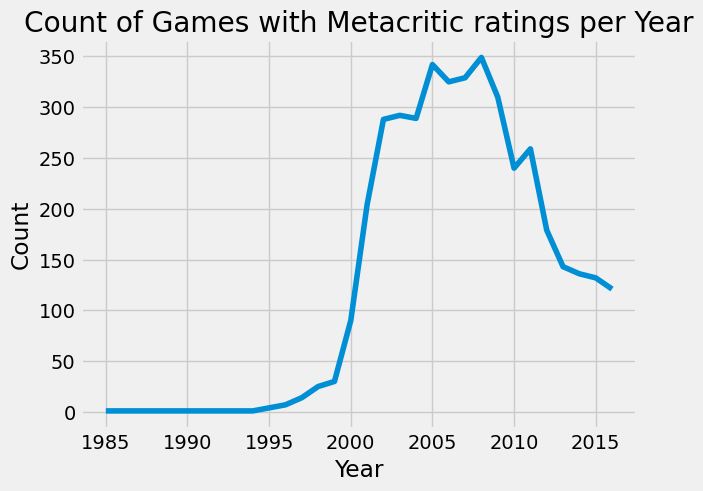

In [40]:
year_game.plot()
plt.title('Count of Games with Metacritic ratings per Year')
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()

# Summary
1. What does critic/user scores and global sales look like?
=> Higher scores tend to have higher sales
1. How does genre affect global sales?
=> Action video games sell the most
1. How much better do popular publishers perform?
=> It looks like Nintendo and EA are the top sellers
1. Find a correlation between count of genre per publisher.
=> Looks like action games are consistently the top published genre for the top 5 publishers. EA produces the most sports games by a very large amount.
1. How do count of games per publisher relate to global sales?
=> Looks like there is a positive trend in count of games and total global sales
1. Which publishers have the highest average ratings?
=> Nintendo has the highest score for users. EA and Nintendo scored similarly for critics
1. How many unique games, with metacritic ratings, are sold globally each year?
=> The count sky-rocketed in 2001 and started to drop in 2009

# Machine Learning Predictive Analysis
In previous analysis, many different features of a video game were looked at in order to determine their correlation with the global sales as well as how statistically significant some of the results were. Some of the features were directly compared and some were group together by their publishers or genre and then compared. In each case, however, only a single feature at a time was being looked at for its effects on global sales. During this part of the project, machine learning will be used in order to increase predictive power and to perform a more in depth analysis of a video game's global sales in regards to more than one of its ungrouped features.

### Regression Models
It was previously seen that using a simple linear regression model to predict the log of global sales of a video game based on its critic score only provided an R2 value of about 16%. What would happen if more features of a video game were added to the linear regression model? Lets start by creating a dataframe with the appropriate features.
### Creating the Dataframe
We are looking at monetary values, therefore we will look at the logarithm for global sales. The publisher feature is non-numerical and contains many different values. In order to incorporate a video game's publisher properties we will categorize each video game based on its publisher's count of appearance in this dataset. Finally, we will create dummy variables through one-hot encoding for the categorical features in order to include them in the linear regression.

In [41]:
#adding the log of global sales column
dfClean['log_sales'] = np.log(dfClean.Global_Sales)

#adding the log of Critic Score column
dfClean['log_Critic_Score'] = np.log(dfClean.Critic_Score)

#adding a count of publishers column for categorization
dfClean['count'] = dfClean.groupby('Publisher')['Publisher'].transform('count')

#count >50 is class 0, 50<= count <150 is class 1, 150<= count <200 is class 2, count >= 200 is class 3
dfClean['pub_class'] = [0 if x < 50 else (1 if x < 150 else (2 if x < 200 else 3)) for x in dfClean['count']]

dfClean.head()

,Name,Genre,Year_of_Release,Publisher,Global_Sales,Critic_Score,User_Score,log_sales,log_Critic_Score,count,pub_class
0,Wii Sports,Sports,2006,Nintendo,82.53,76.0,80.0,4.413162,4.330733,289,3
1,Grand Theft Auto V,Action,2013,Take-Two Interactive,56.57,97.0,83.0,4.035479,4.574711,115,1
2,Mario Kart Wii,Racing,2008,Nintendo,35.52,82.0,83.0,3.570096,4.406719,289,3
3,Wii Sports Resort,Sports,2009,Nintendo,32.77,80.0,80.0,3.489513,4.382027,289,3
4,Call of Duty: Modern Warfare 3,Shooter,2011,Activision,30.59,88.0,34.0,3.420673,4.477337,177,2


We will create a "lean" dataframe containing only the features that will be used for the linear regression

In [42]:
lean = dfClean[['Genre','log_Critic_Score','log_sales','pub_class']]
lean.head()

,Genre,log_Critic_Score,log_sales,pub_class
0,Sports,4.330733,4.413162,3
1,Action,4.574711,4.035479,1
2,Racing,4.406719,3.570096,3
3,Sports,4.382027,3.489513,3
4,Shooter,4.477337,3.420673,2


Next, let's perform one hot encoding on the "genre" and "pub_class" features. This will convert the categorical features into dummy variables so that they can be fed into the linear regression algorithm. Then we will concatenate these dummy variables onto the dataframe that will be used for linear regression.

In [43]:
col = ['Genre','pub_class']
lean1 = pd.concat([lean]+[pd.get_dummies(lean[i],drop_first=True) for i in col],axis=1)
lean1.drop(['Genre','pub_class'],axis=1,inplace=True)
lean1.head()

,log_Critic_Score,log_sales,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,1,2,3
0,4.330733,4.413162,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,4.574711,4.035479,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,4.406719,3.570096,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,4.382027,3.489513,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,4.477337,3.420673,0,0,0,0,0,0,0,1,0,0,0,0,1,0


### Build Models
The lean dataframe will be separated into a features variable and a target variable, X and y. These two variables will then be split into a training set and a testing set. The training set will be fed into several regression models. The model will be fit on the 4 training groups and then tested and scored on the test group. This will be repeated until each group is used as a testing group at least once. The scoring system that will be used will be the adjusted R2. This score will account for increasing the number of features, which will always increase the R2 value. The regression models will then be trained on the entire training set and the root mean squared error (RMSE), the mean absolute error (MAE) and the mean squared error (MSE) will be calculated from the predictions on the testing set.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [45]:
X = lean1.drop('log_sales',axis=1)
y = lean1['log_sales']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((3285, 15), (3285,), (822, 15), (822,))

In [46]:
res = pd.DataFrame()

lr = LinearRegression()
tree = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()

Models = [lr,tree,rf,gb,xgb]

for model in Models:
    print('Model is: {}'.format(model))
    m = model.fit(X_train,y_train)
    print('Training score : {}'.format(m.score(X_train,y_train)))
    prediction = m.predict(X_test)
    print('Predictions are : {}'.format(prediction))
    
    r2score = r2_score(y_test,prediction)
    print('R2 score is : {}'.format(r2score))
    
    mae = mean_absolute_error(y_test,prediction)
    mse = mean_squared_error(y_test,prediction)
    rmse = np.sqrt(mean_squared_error(y_test,prediction))
    print('MAE : {}'.format(mae))
    print('MSE : {}'.format(mse))
    print('RMSE : {}'.format(rmse))

    model_dict = {'Model Name' : model, 'R2 score':r2score,'MAE' : mae,'MSE' : mse,'RMSE' : rmse}
    res = res.append(model_dict,ignore_index=True)
    print(res)
    print('='*80)

Model is: LinearRegression()
Training score : 0.2670819772445955
Predictions are : [-1.01528368e+00  3.57743947e-01 -6.85361230e-01  3.90187427e-01
 -1.32816561e+00 -1.91599577e+00 -9.68919951e-01  7.95797629e-02
 -2.45984998e+00 -2.66645077e-01 -1.65813878e+00 -6.97268482e-01
 -1.00055646e+00 -8.82030284e-01 -2.72137822e-01  3.96178924e-01
  2.83438664e-01 -1.42342313e+00 -2.22791294e+00 -4.85951864e-01
 -2.00866865e+00 -8.23008134e-01 -3.43326764e-01  9.15678668e-02
 -1.39781612e+00  8.35065073e-02  4.12316562e-01 -2.22505391e+00
 -7.93819243e-01 -1.89802604e-01  1.06111847e-01 -2.33742049e+00
 -2.92963030e+00 -1.37029524e+00 -1.14681643e+00 -1.43284977e+00
 -6.50680583e-01 -6.66812450e-01 -1.41558986e+00 -1.19558103e+00
 -2.17911012e+00  2.59203652e-02 -1.44220025e+00 -5.75064249e-01
 -2.29059978e+00 -5.97308556e-01  4.38350248e-01 -1.51894083e+00
  3.01892247e-01 -5.12654417e-01 -8.86453700e-03 -4.22025510e-01
 -6.02238845e-01 -1.29434201e+00 -9.30608307e-01 -4.05370635e-01
 -2.162

In [47]:
models = ['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','XGBRegressor']

result = pd.DataFrame({'Models':models})
result['R2 score'] = res['R2 score']
result['MAE'] = res['MAE']
result['MSE'] = res['MSE']
result['RMSE'] = res['RMSE']
result = result.sort_values(by='R2 score',ascending=False)
result

,Models,R2 score,MAE,MSE,RMSE
3,GradientBoostingRegressor,0.343160,1.014997,1.623979,1.274354
0,LinearRegression,0.297069,1.065783,1.737935,1.318307
4,XGBRegressor,0.215283,1.099446,1.940141,1.392890
2,RandomForestRegressor,0.120865,1.156802,2.173582,1.474307
1,DecisionTreeRegressor,-0.073862,1.272963,2.655029,1.629426


It looks like training the models on the entire training set and testing it on the test set produced a slightly higher R2 value. The root mean squared error is analogous to the standard deviation of the model and indicates how close the predicted values are to the actual values. The root mean squared error produced from the best model (GradientBoostingRegressor) was a 1.2743 for the log of global sales prediction. Given that the actual log global sales values ranges from about -4 to 4, this is a relatively high RMSE value and indicates that this linear regression model may not predict very well.

Let's explore what happens when we turn the prediction of the global sales of a video game into a **classification problem**.

### Classification Models
Given the features of a video games that we have right now, let's see if we can predict wheather or not a video game will have "high sales". For this case, we will classify any video game that has sold more than 1 million units, globally, as having high sales. We will then use classification models to fit a model to the dataset and then calculate its accuracy score in order to determine how well the model performs.

We will label the video games in the data set by adding in a new column called "high_sales". The values in this column will be True(or a 1) if a video game had a global sales value larger than 1, otherwise the value will be False(or a 0). Then we will create a "lean" dataset containing the neccessary features as well as the dummy variables for Genre and pub class.
### Creating the Dataframe

In [48]:
#labeling the data
dfClean['high_sales'] = dfClean['Global_Sales']>1

#adding the log of Critic Score column
dfClean['log_Critic_Score'] = np.log(dfClean.Critic_Score)

#adding the log of User Score column
dfClean['log_User_Score'] = np.log(dfClean.User_Score)

#creating a dataset with video game features and the high_sales target variable
lean_cl = dfClean[['Genre','pub_class','log_Critic_Score','log_User_Score','count','high_sales']]

col = ['Genre','pub_class']
lean2 = pd.concat([lean_cl]+[pd.get_dummies(lean_cl[i],drop_first=True) for i in col],axis=1)
lean2.drop(['Genre','pub_class'],axis=1,inplace=True)

lean2.head()

,log_Critic_Score,log_User_Score,count,high_sales,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,1,2,3
0,4.330733,4.382027,289,True,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,4.574711,4.418841,115,True,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,4.406719,4.418841,289,True,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,4.382027,4.382027,289,True,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,4.477337,3.526361,177,True,0,0,0,0,0,0,0,1,0,0,0,0,1,0


The dataset will be split into its features and target variables. The target variable will need to be encoded in order to feed them into the classifier. Also, the dataset will be split into a training set and hold-out set. The training set will be used to fit and test models and then the hold-out set will be used to give it a final score after the fitting and testing.

**Receiver Operator Characteristic (ROC) Curve**

We will use an ROC curve which is a way to visualize the performance of a binary classifier model. Instead of predicting the class itself, we can predict the probability that it will be the class. Knowing the probabilities allows us to set different threshold values for the classification. For example, if we set the threshold value to be 0.40, then any video game having a greater than 0.40 probability of being classified as having high sales will indeed be classified as such. The ROC curve visualizes the ratio of true positive rate and false positive rates of a model given various threshold values. The better model would be towards the upper left of the plot where the true positive rate is 1.0 and the false positive rate is 0. The worse model would be towards the black line crossing diagonally through the plot. The black line represents a model that does no better than randomly guessing a class. The area under the curve (AUC) gives a value that can numerically represent how well a model performed given the ROC curve.

In [49]:
lean2['high_sales'] = lean2['high_sales'].map({True:1,False:0})
X = lean2.drop('high_sales',axis=1)
y = lean2['high_sales']

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3285, 17), (822, 17), (3285,), (822,))

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_curve,roc_auc_score,confusion_matrix,classification_report

Model is: LogisticRegression()
Predictions are : [0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 

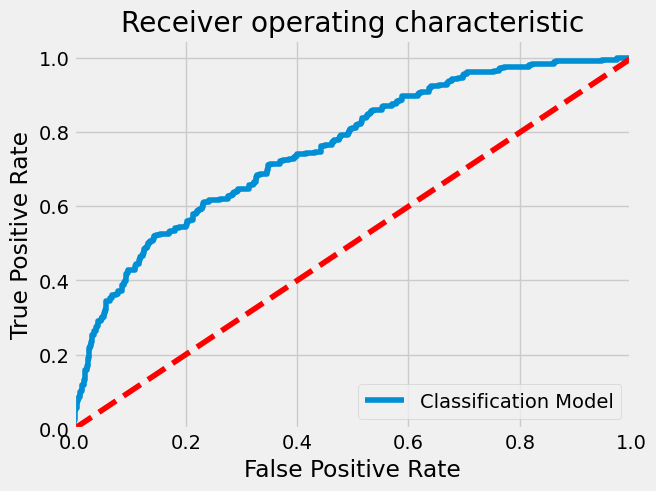

Model is: DecisionTreeClassifier()
Predictions are : [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1
 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1
 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 

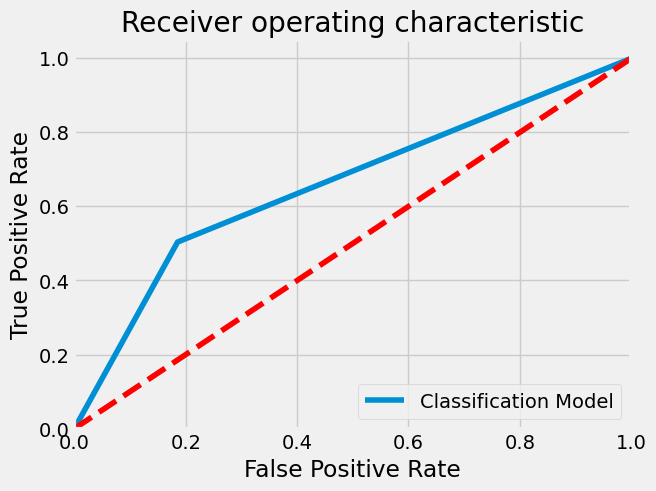

Model is: RandomForestClassifier()
Predictions are : [0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0
 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 

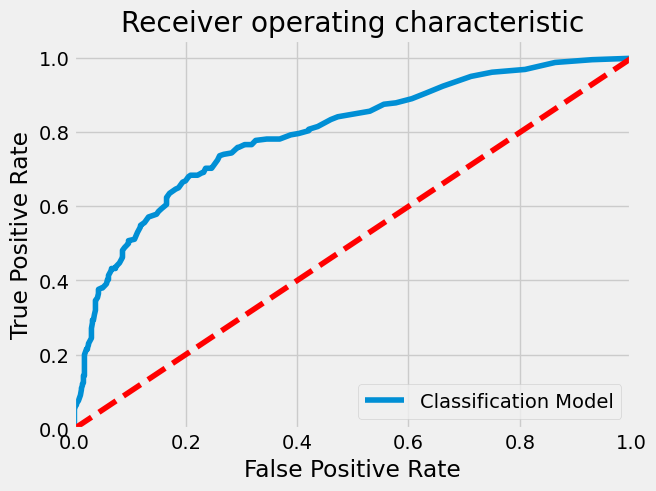

Model is: KNeighborsClassifier()
Predictions are : [1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0
 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1
 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 

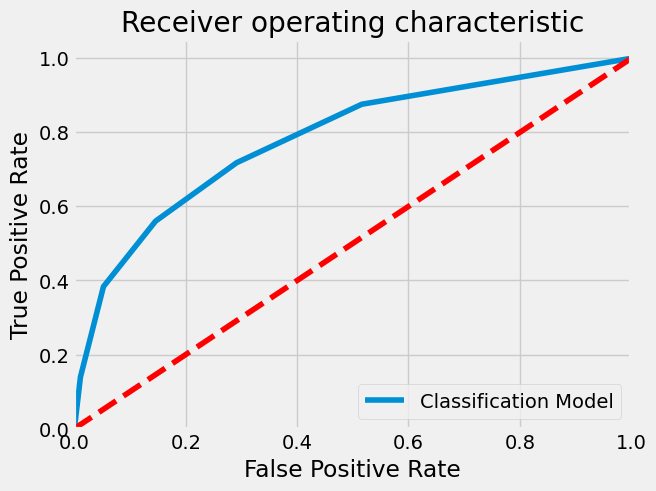

In [52]:
res = pd.DataFrame()

lr = LogisticRegression()
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()

Models = [lr,tree,rf,knn]

for model in Models:
    print('Model is: {}'.format(model))
    m = model.fit(X_train,y_train)
    prediction = m.predict(X_test)
    print('Predictions are : {}'.format(prediction))
    
    # confusion matrix
    matrix = confusion_matrix(y_test,prediction)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    tp, fn, fp, tn = confusion_matrix(y_test,prediction).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy
    C_Report = classification_report(y_test,prediction,labels=[1,0])
    print('Classification report : \n', C_Report)

    # calculating the metrics
    sensitivity = round(tp/(tp+fn), 3)
    specificity = round(tn/(tn+fp), 3)
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
    balanced_accuracy = round((sensitivity+specificity)/2, 3)
    
    precision = round(tp/(tp+fp), 3)
    f1Score = round((2*tp/(2*tp + fp + fn)), 3)
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    
    # ROC Curve
    print('roc_auc_score:', round(roc_auc_score(y_test,prediction), 3))
    
    logit_roc_auc = roc_auc_score(y_test, prediction)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('='*80)
    
    model_dict = {'Model Name' : model, 
                  'True Positive' : tp, 
                  'False Negative' : fn, 
                  'False Positive' : fp,
                  'True Negative' : tn,
                  'Accuracy' : accuracy,
                  'Precision' : precision,
                  'Recall' : sensitivity,
                  'F1 Score' : f1Score,
                  'Specificity' : specificity,
                  'ROC_AUC_Score':roc_auc_score(y_test, prediction),
                  'Balanced Accuracy':balanced_accuracy}   
    res = res.append(model_dict,ignore_index=True)

In [53]:
models={'models':['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier']}
out=pd.DataFrame(models)
out['Accuracy']=res['Accuracy']
out['Precision']=res['Precision']
out['Recall']=res['Recall']
out['F1 Score']=res['F1 Score']
out['True Positive']=res['True Positive']
out['False Negative']=res['False Negative']
out['False Positive']=res['False Positive']
out['True Negative']=res['True Negative']
out.sort_values(by=['Accuracy','F1 Score','Recall','Precision'],ascending=False,inplace=True)
out.reset_index(drop=True,inplace=True)
out

,models,Accuracy,Precision,Recall,F1 Score,True Positive,False Negative,False Positive,True Negative
0,RandomForestClassifier,0.769,0.792,0.892,0.839,496.0,60.0,130.0,136.0
1,KNeighborsClassifier,0.759,0.802,0.854,0.828,475.0,81.0,117.0,149.0
2,LogisticRegression,0.746,0.748,0.942,0.834,524.0,32.0,177.0,89.0
3,DecisionTreeClassifier,0.714,0.774,0.815,0.794,453.0,103.0,132.0,134.0


Looking at the AUC for each of the models it appears that the random forest classifier seems to be the best classifier for prediction given this dataset. It tied in best performance out-of-the-box, scored the highest and had the highest precision score in predicting the postive class, and had the highest area under the curve in the ROC curve plot. The other three classification models performed very similarly to each other.

Let's use random forest classifier model to make the prediction.

In [54]:
y_pred=rf.predict(X_test)
out=pd.DataFrame({'actual':y_test,'predicted':y_pred})
out=lean2.merge(out,left_index=True,right_index=True)
out['actual'].replace(1,'True',inplace=True)
out['actual'].replace(0,'False',inplace=True)
out['predicted'].replace(1,'True',inplace=True)
out['predicted'].replace(0,'False',inplace=True)
out.sample(10)

,log_Critic_Score,log_User_Score,count,high_sales,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,1,2,3,actual,predicted
30,4.442651,4.234107,348,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,True,True
1420,4.094345,4.394449,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,False,False
761,4.406719,4.430817,277,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,True,True
3927,4.406719,4.418841,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False
3904,3.951244,3.951244,256,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,False,False
251,4.343805,4.369448,289,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,True,True
2254,3.891820,3.871201,98,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,False,False
1575,4.110874,4.189655,256,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,False,False
3265,2.944439,2.564949,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,False,False
33,4.574711,4.442651,115,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,True,True


# Machine Learning Summary
Machine learning is a very power tool in providing predictive and analytical solutions to problems in data. There are many models that can be applied to endless types of datasets and many insights and solutions can be found. In regards to this project, the predictive power of the linear regression model was improved from 16% to about 30% by applying more than one feature of a video game to the model. It was also seen that by framing the question as a classification problem, powerful algorithms could be used to predict whether or not a video game would sell more than 1 million units, globally. The model that fit this dataset the best was random forest. This model was able to correctly classify a video game with an accuracy of 78% and a precision of about 79%.

I believe these scores have the potential to be improved. During the data wrangling portion of this dataset a lot of the data was either aggregated or discarded. A different approach, such as keeping the "Platform" or "sales per country" features, could possibly lead to the availability of more data. Other models could have also been explored and deeper hyperparameter tuning could have also been performed. Another avenue that could be explored would be to balance the classes of the dataset to see if that would provide greater scores.